In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:
def evaluation(x, knots, data):    
    n = len(data)-1
    f = np.array(data)
    for m in range(1,n):
        for j in range(n-m):
            f[j] = ((x-knots[j])*f[j+1]-(x-knots[j+m])*f[j])\
            /(knots[j+m]-knots[j])
        
    return f[0]



In [3]:
def exp(h):
    return (np.exp(h)-1)/h

In [5]:
def neville(func, m, n):
    matrix = np.zeros((m+1,n+1))

    for j in range(1,m+1):
        for k in range(0,n+1):
            x = np.array([2**(-(j+l)) for l in range(k+1)])
            y = func(x)

            matrix[j,k]=evaluation(0,x,y) 

    return matrix


In [6]:
M = 10
h = np.array([2**(-(l)) for l in range(M+1)]) 
N = neville(exp, M,4)

[None, None]

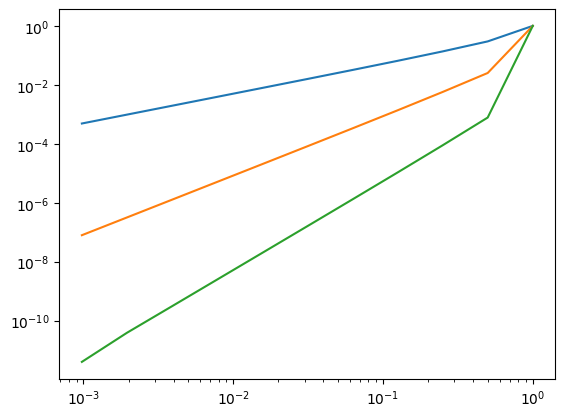

In [7]:
fig, ax = plt.subplots(1,1)

ax.plot(h[:], abs(N[:,1]-1))
ax.plot(h[:], abs(N[:,2]-1))
ax.plot(h[:], abs(N[:,3]-1))

ax.set(xscale='log', yscale='log')

In [111]:
N

array([[1.71828183, 1.71828183, 0.87660325, 1.00747997, 0.9998204 ],
       [1.29744254, 1.29744254, 0.97476079, 1.00077785, 0.99999046],
       [1.13610167, 1.13610167, 0.99427358, 1.00008889, 0.99999945],
       [1.06518762, 1.06518762, 0.99863506, 1.00001063, 0.99999997],
       [1.03191134, 1.03191134, 0.99966674, 1.0000013 , 1.        ],
       [1.01578904, 1.01578904, 0.99991766, 1.00000016, 1.        ],
       [1.00785335, 1.00785335, 0.99997954, 1.00000002, 1.        ],
       [1.00391644, 1.00391644, 0.9999949 , 1.        , 1.        ],
       [1.00195567, 1.00195567, 0.99999873, 1.        , 1.        ],
       [1.0009772 , 1.0009772 , 0.99999968, 1.        , 1.        ],
       [1.00048844, 1.00048844, 0.99999992, 1.        , 1.        ]])